<a href="https://colab.research.google.com/github/ankit-chuahan/rossman_sales_analysis__/blob/main/ml_end_term_ankit.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Machine Learning**

In [89]:
# importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [3]:
# loading dataframe
rossman = pd.read_csv('Rossmann Stores Data.csv')
store = pd.read_csv('store.csv')

<ipython-input-3-8fe2ef2546f2>:2: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  rossman = pd.read_csv('Rossmann Stores Data.csv')


In [5]:
# checking shape of dataframe
rossman.shape,store.shape

((1017209, 9), (1115, 10))

In [7]:
# top n rows of rossman datset
rossman.head(5)

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


In [8]:
# top n rows of store dataset
store.head(5)

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


In [10]:
# now we have to merge both the column
# store is common in both column
df = pd.merge(rossman, store, on = 'Store', how ='left')

In [12]:
# sample  of dataframe
df.sample(5)

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
498105,486,5,2014-04-11,3866,504,1,0,0,0,a,a,2320.0,NaN,NaN,1,31.0,2013.0,"Jan,Apr,Jul,Oct"
822552,468,1,2013-06-24,4943,600,1,0,0,1,c,c,5260.0,9.0,2012.0,0,NaN,NaN,NaN
494255,1096,2,2014-04-15,6884,768,1,1,0,1,a,c,1130.0,NaN,NaN,1,10.0,2014.0,"Mar,Jun,Sept,Dec"
903904,425,5,2013-04-12,3201,433,1,1,0,0,d,c,1460.0,NaN,NaN,0,NaN,NaN,NaN
862043,934,1,2013-05-20,0,0,0,0,a,0,a,c,5460.0,NaN,NaN,1,14.0,2011.0,"Jan,Apr,Jul,Oct"


In [16]:
# checking duplicates
print("Number of duplicate value in dataframe  is--->",df.duplicated().sum())


Number of duplicate value in dataframe  is---> 0


In [19]:
# To check the shape of dataframe
print(f"the shape of datset is ",df.shape)
print(f"No. of rows-", df.shape[0])
print(f"No. of columns-", df.shape[1])

the shape of datset is  (1017209, 18)
No. of rows- 1017209
No. of columns- 18


In [20]:
# info use to find datatype and memory usage
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1017209 entries, 0 to 1017208
Data columns (total 18 columns):
 #   Column                     Non-Null Count    Dtype  
---  ------                     --------------    -----  
 0   Store                      1017209 non-null  int64  
 1   DayOfWeek                  1017209 non-null  int64  
 2   Date                       1017209 non-null  object 
 3   Sales                      1017209 non-null  int64  
 4   Customers                  1017209 non-null  int64  
 5   Open                       1017209 non-null  int64  
 6   Promo                      1017209 non-null  int64  
 7   StateHoliday               1017209 non-null  object 
 8   SchoolHoliday              1017209 non-null  int64  
 9   StoreType                  1017209 non-null  object 
 10  Assortment                 1017209 non-null  object 
 11  CompetitionDistance        1014567 non-null  float64
 12  CompetitionOpenSinceMonth  693861 non-null   float64
 13  CompetitionO

**Observation **


- There are 1017209 rows and 19 columns in the dataset.
- The data types include int64, float64, and object.
- The memory usage of the dataset is approximately 148.4 MB.
- The dataset contains 1017209 rows and 18 columns.
- There are some missing values in  columns.
- The data types of the columns are:
    - object: 9 columns
    - int64: 7 columns
    - float64: 2 columns
- The 'Date' column is of object type, which may need to be converted to a datetime format for further analysis.


In [21]:
df.describe()

,Store,DayOfWeek,Sales,Customers,Open,Promo,SchoolHoliday,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear
count,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.014567e+06,693861.000000,693861.000000,1.017209e+06,509178.000000,509178.000000
mean,5.584297e+02,3.998341e+00,5.773819e+03,6.331459e+02,8.301067e-01,3.815145e-01,1.786467e-01,5.430086e+03,7.222866,2008.690228,5.005638e-01,23.269093,2011.752774
std,3.219087e+02,1.997391e+00,3.849926e+03,4.644117e+02,3.755392e-01,4.857586e-01,3.830564e-01,7.715324e+03,3.211832,5.992644,4.999999e-01,14.095973,1.662870
min,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.000000e+01,1.000000,1900.000000,0.000000e+00,1.000000,2009.000000
25%,2.800000e+02,2.000000e+00,3.727000e+03,4.050000e+02,1.000000e+00,0.000000e+00,0.000000e+00,7.100000e+02,4.000000,2006.000000,0.000000e+00,13.000000,2011.000000
50%,5.580000e+02,4.000000e+00,5.744000e+03,6.090000e+02,1.000000e+00,0.000000e+00,0.000000e+00,2.330000e+03,8.000000,2010.000000,1.000000e+00,22.000000,2012.000000
75%,8.380000e+02,6.000000e+00,7.856000e+03,8.370000e+02,1.000000e+00,1.000000e+00,0.000000e+00,6.890000e+03,10.000000,2013.000000,1.000000e+00,37.000000,2013.000000
max,1.115000e+03,7.000000e+00,4.155100e+04,7.388000e+03,1.000000e+00,1.000000e+00,1.000000e+00,7.586000e+04,12.000000,2015.000000,1.000000e+00,50.000000,2015.000000


**Observation**


- The mean of the `Sales` column is 5773.88, with a standard deviation of 3849.92. This indicates that there is a wide range of sales values, with some stores having much higher sales than others.
- The mean of the `Customers` column is 633.14, with a standard deviation of 464.45. This also indicates a wide range of customer counts across different stores.
- The minimum values for both `Sales` and `Customers` are 0, which could indicate that some stores had no sales or customers on certain days.
- The maximum value for `Sales` is 41551, and the maximum value for `Customers` is 7388. These high values suggest that some stores had exceptionally high sales or customer counts on certain days.
- Similarly, 25% of stores had fewer than 405 customers, and 75% of stores had fewer than 837 customers.

# **DATA Preprocessing**

Data preprocessing is a crucial step in any machine learning project, as it involves cleaning, transforming, and formatting the raw data to make it suitable for analysis and modeling. In the context of the credit card fraud detection project, data preprocessing typically includes the following steps:

1. **Data Cleaning:**
    - Removing duplicate or missing values.
    - Handling outliers.
    - Filling missing values with appropriate strategies.

2. **Feature Engineering:**
    - Creating new features that are more informative or relevant to the prediction task.
    - Transforming existing features to improve their distribution or interpretability.

By performing these preprocessing steps, we can improve the quality and relevance of the data, which ultimately leads to better performance andgeneralizability of the trained machine learning model.

In [28]:
# checking null values
df.isnull().sum()

Store                             0
DayOfWeek                         0
Date                              0
Sales                             0
Customers                         0
Open                              0
Promo                             0
StateHoliday                      0
SchoolHoliday                     0
StoreType                         0
Assortment                        0
CompetitionDistance            2642
CompetitionOpenSinceMonth    323348
CompetitionOpenSinceYear     323348
Promo2                            0
Promo2SinceWeek              508031
Promo2SinceYear              508031
PromoInterval                508031
dtype: int64

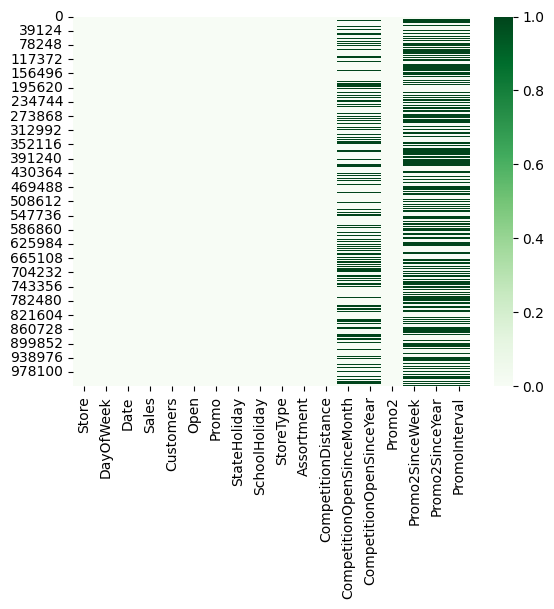

In [27]:
# Visulaising null values
sns.heatmap(df.isnull(),cmap="Greens")
plt.show()


There is  null value present in this data frame soo we have to handle those

In [33]:
# Handling missing values
# Replacing Null values in CompetitionDistance with median.
df['CompetitionDistance'].fillna(df['CompetitionDistance'].median(), inplace = True)
# Replacing Null values with 0 in CompetitionOpenSinceMonth
df['CompetitionOpenSinceMonth'] = df['CompetitionOpenSinceMonth'].fillna(0)
# Replacing Null values with 0 in CompetitionOpenSinceYear
df['CompetitionOpenSinceYear'] = df['CompetitionOpenSinceYear'].fillna(0)
# Replacing Null values with 0 in Promo2SinceWeek
df['Promo2SinceWeek'] = df['Promo2SinceWeek'].fillna(0)

## Replacing Null values with 0 in Promo2SinceYear
df['Promo2SinceYear'] = df['Promo2SinceYear'].fillna(0)

## Replacing Null values with 0 in PromoInterval
df['PromoInterval'] =df['PromoInterval'].fillna(0)


In [ ]:
# first 'Date' object column
# Extracting year, month and day from "Date" using pd.to_datetime
# and Droping column 'Date
df['Date'] = pd.to_datetime(df['Date'])
df['Year'] = df['Date'].apply(lambda x: x.year)
df['Month'] = df['Date'].apply(lambda x: x.month)
df['Day'] = df['Date'].apply(lambda x: x.day)

In [29]:
# checking duplictates
df.duplicated().sum()

0

In [30]:
# Dropping duplicate values from dataframe if there is any present
df.drop_duplicates(inplace=True)

In [34]:
# Checking if there is any null values present
df.isnull().sum()

Store                        0
DayOfWeek                    0
Date                         0
Sales                        0
Customers                    0
Open                         0
Promo                        0
StateHoliday                 0
SchoolHoliday                0
StoreType                    0
Assortment                   0
CompetitionDistance          0
CompetitionOpenSinceMonth    0
CompetitionOpenSinceYear     0
Promo2                       0
Promo2SinceWeek              0
Promo2SinceYear              0
PromoInterval                0
Year                         0
Month                        0
Day                          0
dtype: int64

In [ ]:
# dropping date column
df.drop(['Store','Date'],axis=1,inplace=True)

## ***2. Understanding Your Variables***

In [35]:
# names of columns in dataframe
df.columns

Index(['Store', 'DayOfWeek', 'Date', 'Sales', 'Customers', 'Open', 'Promo',
       'StateHoliday', 'SchoolHoliday', 'StoreType', 'Assortment',
       'CompetitionDistance', 'CompetitionOpenSinceMonth',
       'CompetitionOpenSinceYear', 'Promo2', 'Promo2SinceWeek',
       'Promo2SinceYear', 'PromoInterval', 'Year', 'Month', 'Day'],
      dtype='object')

In [36]:
#  filtering out categorical and numeric columns

categorical_cols = [col for col in df.columns if df[col].dtype == 'object']
numeric_cols = [col for col in df.columns if df[col].dtype in ['int64', 'float64']]

print('Categorical columns:', categorical_cols)
print('Numeric columns:', numeric_cols)


Categorical columns: ['StateHoliday', 'StoreType', 'Assortment', 'PromoInterval']
Numeric columns: ['Store', 'DayOfWeek', 'Sales', 'Customers', 'Open', 'Promo', 'SchoolHoliday', 'CompetitionDistance', 'CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear', 'Promo2', 'Promo2SinceWeek', 'Promo2SinceYear', 'Year', 'Month', 'Day']


# **Variable Description**

* **Store**: This is the unique identifier for each store.
* **Date**: This is the date of the sale.
* **DayOfWeek**: This is the day of the week of the sale.
* **Open**: This is a binary variable indicating whether the store was open on the date of the sale.
* **Promo**: This is a binary variable indicating whether there was a promotion on the date of the sale.
* **SchoolHoliday**: This is a binary variable indicating whether there was a school holiday on the date of the sale.
* **StoreType**: This is the type of store.
* **Assortment**: This is the assortment of products sold at the store.
* **CompetitionDistance**: This is the distance to the nearest competitor.
* **CompetitionOpenSinceMonth**: This is the month in which the nearest competitor opened.
* **CompetitionOpenSinceYear**: This is the year in which the nearest competitor opened.
* **Promo2**: This is a binary variable indicating whether there was a second promotion on the date of the sale.
* **Promo2SinceWeek**: This is the week in which the second promotion started.
* **Promo2SinceYear**: This is the year in which the second promotion started.
* **PromoInterval**: This is the interval between promotions.
* **Year**: This is the year of the sale.
* **Month**: This is the month of the sale.
* **Day**: This is the day of the month of the sale.


In [37]:
df.describe()

,Store,DayOfWeek,Sales,Customers,Open,Promo,SchoolHoliday,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,Year,Month,Day
count,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06
mean,5.584297e+02,3.998341e+00,5.773819e+03,6.331459e+02,8.301067e-01,3.815145e-01,1.786467e-01,5.422034e+03,4.926878e+00,1.370173e+03,5.005638e-01,1.164767e+01,1.007011e+03,2.013832e+03,5.846762e+00,1.570279e+01
std,3.219087e+02,1.997391e+00,3.849926e+03,4.644117e+02,3.755392e-01,4.857586e-01,3.830564e-01,7.706913e+03,4.283543e+00,9.353634e+02,4.999999e-01,1.532393e+01,1.005877e+03,7.773960e-01,3.326097e+00,8.787638e+00
min,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.000000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.013000e+03,1.000000e+00,1.000000e+00
25%,2.800000e+02,2.000000e+00,3.727000e+03,4.050000e+02,1.000000e+00,0.000000e+00,0.000000e+00,7.100000e+02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.013000e+03,3.000000e+00,8.000000e+00
50%,5.580000e+02,4.000000e+00,5.744000e+03,6.090000e+02,1.000000e+00,0.000000e+00,0.000000e+00,2.330000e+03,4.000000e+00,2.006000e+03,1.000000e+00,1.000000e+00,2.009000e+03,2.014000e+03,6.000000e+00,1.600000e+01
75%,8.380000e+02,6.000000e+00,7.856000e+03,8.370000e+02,1.000000e+00,1.000000e+00,0.000000e+00,6.880000e+03,9.000000e+00,2.011000e+03,1.000000e+00,2.200000e+01,2.012000e+03,2.014000e+03,8.000000e+00,2.300000e+01
max,1.115000e+03,7.000000e+00,4.155100e+04,7.388000e+03,1.000000e+00,1.000000e+00,1.000000e+00,7.586000e+04,1.200000e+01,2.015000e+03,1.000000e+00,5.000000e+01,2.015000e+03,2.015000e+03,1.200000e+01,3.100000e+01


**Observation**


- The mean of the `Sales` column is 5773.88, with a standard deviation of 3849.92. This indicates that there is a wide range of sales values, with some stores having much higher sales than others.
- The mean of the `Customers` column is 633.14, with a standard deviation of 464.45. This also indicates a wide range of customer counts across different stores.
- The minimum values for both `Sales` and `Customers` are 0, which could indicate that some stores had no sales or customers on certain days.
- The maximum value for `Sales` is 41551, and the maximum value for `Customers` is 7388. These high values suggest that some stores had exceptionally high sales or customer counts on certain days.
- Similarly, 25% of stores had fewer than 405 customers, and 75% of stores had fewer than 837 customers.

# **Checking Distinct values in columns**

In [56]:
df['DayOfWeek'].unique()


array([5, 4, 3, 2, 1, 7, 6])

In [57]:
df['Open'].unique()


array([1, 0])

Where 1 mean open
0 means Closed

In [58]:
df['StateHoliday'].unique()

array([0, 'a', 'b', 'c'], dtype=object)

There are some values in str format and some in numeric soo we have to handle this where 0 indicates no holiday  and a,b,c indicates differnt holidays

In [59]:
# Replacing all '0' with 0
df['StateHoliday'] = df['StateHoliday'].replace("0",0)

In [60]:
# chceking unique value in store type column
df['StoreType'].unique()

array(['c', 'a', 'd', 'b'], dtype=object)

So there are 4 type of store (A B C  D)

In [61]:
# checking unique values in assortment column
df['Assortment'].unique()

array(['a', 'c', 'b'], dtype=object)

3 type of assortment are A- Basic B - Average C - Good

In [62]:
df['PromoInterval'].unique()

array([0, 'Jan,Apr,Jul,Oct', 'Feb,May,Aug,Nov', 'Mar,Jun,Sept,Dec'],
      dtype=object)

In [63]:
# Checking unique values of day , month and year
df['Month'].unique(),df['Day'].unique() ,df['Year'].unique()

(array([ 7,  6,  5,  4,  3,  2,  1, 12, 11, 10,  9,  8]),
 array([31, 30, 29, 28, 27, 26, 25, 24, 23, 22, 21, 20, 19, 18, 17, 16, 15,
        14, 13, 12, 11, 10,  9,  8,  7,  6,  5,  4,  3,  2,  1]),
 array([2015, 2014, 2013]))

In [64]:
df['Customers'].unique()

array([ 555,  625,  821, ..., 3900,   36, 4065])

In [65]:
df['Promo'].unique()

array([1, 0])

Where 1 means there is promotion and 0 means no promotion

In [66]:
df['SchoolHoliday'].unique()

array([1, 0])

In [67]:
df['CompetitionOpenSinceMonth'].unique()

array([ 9., 11., 12.,  4., 10.,  8.,  0.,  3.,  6.,  5.,  1.,  2.,  7.])

In [68]:
df['CompetitionOpenSinceYear'].unique()

array([2008., 2007., 2006., 2009., 2015., 2013., 2014., 2000., 2011.,
          0., 2010., 2005., 1999., 2003., 2012., 2004., 2002., 1961.,
       1995., 2001., 1990., 1994., 1900., 1998.])

In [69]:
df['Promo2'].unique()

array([0, 1])

# **Univerate Analysis**

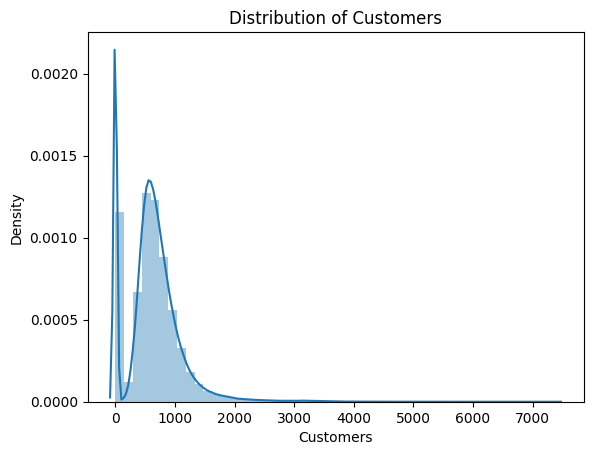

In [90]:
# 1. **Distribution of Customers:**

sns.distplot(df['Customers'])
plt.title('Distribution of Customers')
plt.show()


The distribution of customers is slightly right-skewed, indicating that there are a few stores with exceptionally high customer counts.

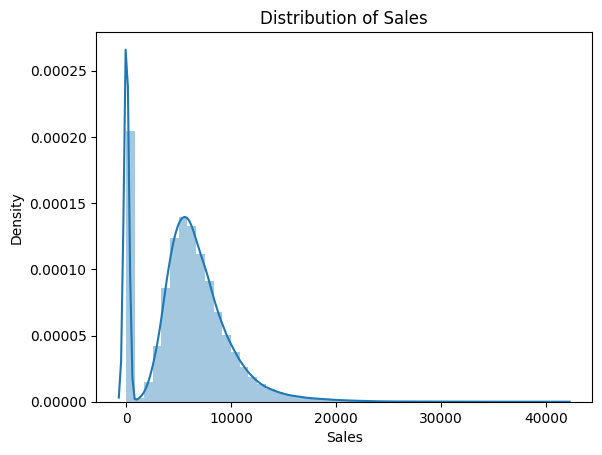

In [92]:
sns.distplot(df['Sales'])
plt.title('Distribution of Sales')
plt.show()

The distribution of sales is also right-skewed, with a few stores having very high sales compared to the majority of stores.

# **Multiverate Analysis**

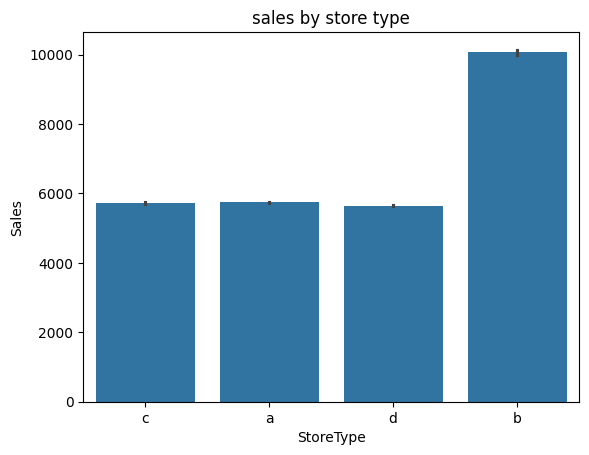

In [72]:
# a bar graph of sales by store type
sns.barplot(x='StoreType', y='Sales', data=df)
plt.title('sales by store type')
plt.show()


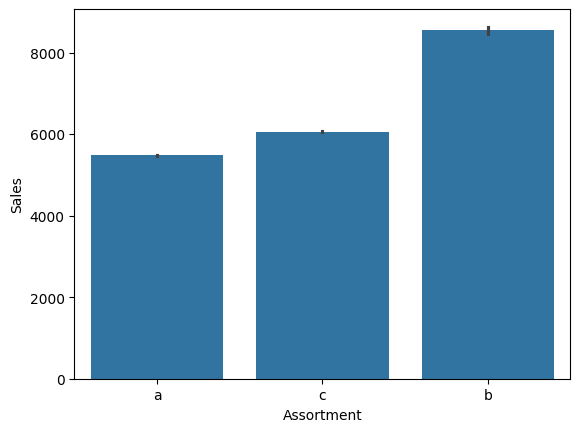

In [73]:
sns.barplot(x='Assortment', y='Sales', data=df)
plt.show()


Sales is very high where Store and Assortment type is (b)

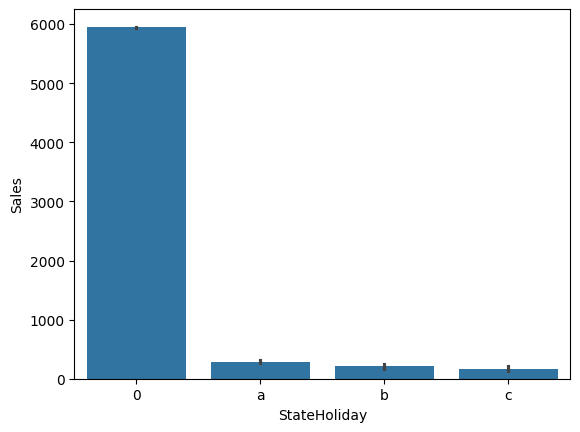

In [76]:
# sales effected by holidays

sns.barplot(x='StateHoliday', y='Sales', data=df)
plt.show()


We can clearly see there very less sales on holidays

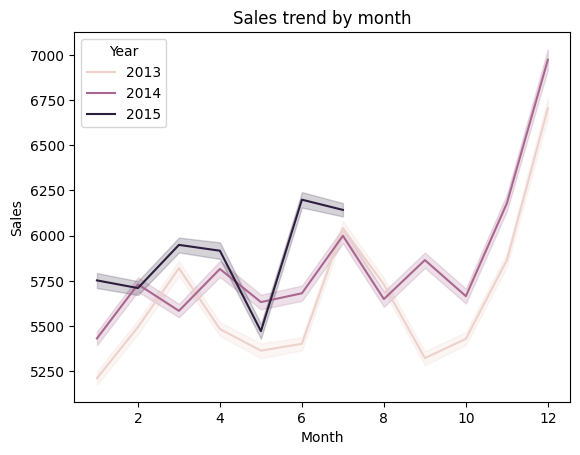

In [81]:
# Salest trend by month
sns.lineplot(x='Month', y='Sales', data=df,hue='Year')
plt.title("Sales trend by month")
plt.show()


There will be huges sales in last quater of the year maybe it is because of the festival seasons

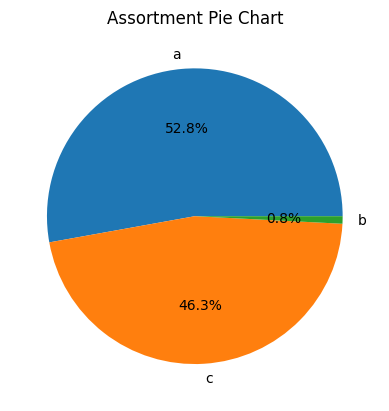

In [93]:
# Ploting a pie chart of the assortment counts
assortment_counts = df['Assortment'].value_counts()

plt.pie(assortment_counts, labels=assortment_counts.index, autopct='%1.1f%%')
plt.title('Assortment Pie Chart')
plt.show()

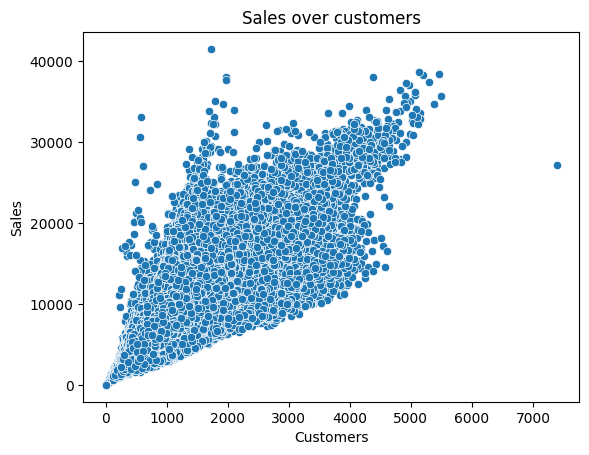

In [94]:
sns.scatterplot(x='Customers',y='Sales',data=df,)
plt.title('Sales over customers')
plt.show()

From the above chart we can clearly see that sales is directly effected by the customers

# **Multiverate Analysis**

In [103]:
# correlation  matrix with sales

corr = df.corr()
sales_corr = corr['Sales'].sort_values(ascending=False)
print(sales_corr)



Sales                        1.000000
Customers                    0.894711
Open                         0.678472
Promo                        0.452345
SchoolHoliday                0.085124
Month                        0.048768
Year                         0.023519
Store                        0.005126
CompetitionOpenSinceYear     0.002749
Day                         -0.011612
CompetitionOpenSinceMonth   -0.012431
CompetitionDistance         -0.018870
Promo2SinceWeek             -0.044143
Promo2                      -0.091040
Promo2SinceYear             -0.091056
DayOfWeek                   -0.462125
Name: Sales, dtype: float64


-There is a strong positive correlation between `Sales` and `Customers`, indicating that stores with more customers tend to have higher sales.

-The strongest positive correlation is observed between `Sales` and `Promo`, indicating that stores with promotions tend to have higher sales.

-`PromoInterval`: There is a very weak negative correlation between `Sales` and `PromoInterval`, suggesting that stores with longer intervals between promotions may have slightly lower sales.

-- `CompetitionDistance`: There is a weak positive correlation between `Sales` and `CompetitionDistance`, suggesting that stores located further away from competitors may have slightly higher sales.


In [ ]:
df.drop(['SchoolHoliday','Store','Promo2SinceYear','Promo2'])